In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 6)
plt.style.use('ggplot')

/Users/sobrison/anaconda/envs/nilmtk-env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# NILMTK: Non-Intrusive Load Monitoring ToolKit 

Se trata de una herramienta *open source* para *investigadores* con la que poder evaluar la precisión de algoritmos de desagregación mediante el uso de métricas. Proporciona además una serie de algoritmos previamente implementados en la plataforma, los cuales se pueden usar como *benchmark*. Además, permite una rápida y fácil evaluación de distintos datasets. 

Pasamos ahora a ver las características más importantes de NILMTK 

## Cargando un dataset y convirtiéndolo al estándar h5

Como ejemplo, usaremos el dataset **REDD**

Primero convertimos al estándar h5. 

In [2]:
from nilmtk.dataset_converters import convert_redd
convert_redd('../nilmtk/data/REDD/low_freq/', 'data/redd.h5')

Loading house 1... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
Loading house 2... 1 2 3 4 5 6 7 8 9 10 11 
Loading house 3... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Loading house 4... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
Loading house 5... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
Loading house 6... 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 
Done converting YAML metadata to HDF5!
Done converting REDD to HDF5!


Posteriormente, abrimos el dataset

In [3]:
from nilmtk import DataSet
redd = DataSet('data/redd.h5')

En realidad, todavía no hemos cargado nada en memoria. Simplemente hemos *linkado* los datos a la variable *redd*. No sólo obtenemos un único archivo con todos los datos comprimidos, sino que también obtenemos los metadatos. 

In [4]:
from nilmtk.utils import print_dict
print_dict(redd.metadata)

Los datos se organizan en *buildings* y, dentro de estos, en *elec* (de clase MeterGroup)

## MeterGroup 

Se trata de la clase clave en nilmtk. Es una lista de *meters*. Estos se pueden agrupar en base a distintos criterios: por edificio, por clase de electrodoméstico, por unidades físicas, etc. Una vez agrupados, MeterGroup nos facilita operaciones comunes como la de obtener la suma del consumo general de dicho MeterGroup. 

In [5]:
print_dict(redd.buildings)
elec=redd.buildings[1].elec
print elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric 

Los MeterGroup con nombre *site_meter* se tratan del consumo agregado

In [6]:
elec.mains()

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REDD', site_meter, appliances=[])
)

La potencia conjunta es: 

In [7]:
elec_mains=elec.mains()
elec_mains.power_series_all_data().head()

Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


2011-04-18 09:22:09-04:00    342.820007
2011-04-18 09:22:10-04:00    344.559998
2011-04-18 09:22:11-04:00    345.140015
2011-04-18 09:22:12-04:00    341.679993
2011-04-18 09:22:13-04:00    341.029999
Name: (power, apparent), dtype: float64

Podemos obtener los *submeters* (smart-plugs) de la siguiente manera: 

In [8]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=5, building=1, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])
  ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])
  ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=14, building=1, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])
  ElecMeter(insta

Los MeterGroups pueden estar anidados: 

In [9]:
elec.nested_metergroups()

[MeterGroup(meters=
   ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
   ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
 ), MeterGroup(meters=
   ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
   ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
 )]

#### Algunas estadísticas  con MeterGroup

La energia total dada: 

In [10]:
elec.mains().total_energy()

Calculating total_energy for ElecMeterID(instance=2, building=1, dataset='REDD') ...   

apparent    167.766283
dtype: float64

Y por *submeter*: 

In [11]:
energy_per_meter=elec.submeters().energy_per_meter()
energy_per_meter

15/16 MeterGroup(meters=
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
16/16 MeterGroup(meters=
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
Calculating total_energy for ElecMeterID(instance=20, building=1, dataset='REDD') ...   

,"(5, 1, REDD)","(6, 1, REDD)","(7, 1, REDD)","(8, 1, REDD)","(9, 1, REDD)","(11, 1, REDD)","(12, 1, REDD)","(13, 1, REDD)","(14, 1, REDD)","(15, 1, REDD)","(16, 1, REDD)","(17, 1, REDD)","(18, 1, REDD)","(19, 1, REDD)","(((3, 1, REDD), (4, 1, REDD)),)","(((10, 1, REDD), (20, 1, REDD)),)"
active,44.750925,19.920875,16.786282,22.939649,30.734511,16.890262,5.221226,0.096302,0.411592,4.507334,2.256583,18.288595,11.811224,0.000085,8.81796,32.614809
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ElecMeter

Representa un único medidor (smart-plug). Cada medidor puede estar asociado a uno o más electrodomésticos. ElecMeter tiene la mayoría de los métodos estadísticos de MeterGroup. 

Por ejemplo, vamos a seleccionar el frigorífico del edificio 1:

In [12]:
fridge=redd.buildings[1].elec['fridge']

Podemos a su vez obtener los metadatos para dicho ElecMeter: 

In [13]:
fridge.device

{'description': 'Measures circuit-level power demand.  Comes with 24 CTs. This FAQ page suggests the eMonitor measures real (active) power: http://www.energycircle.com/node/14103  although the REDD readme.txt says all channels record apparent power.\n',
 'manufacturer': 'Powerhouse Dynamics',
 'manufacturer_url': 'http://powerhousedynamics.com',
 'max_sample_period': 50,
 'measurements': [{'lower_limit': 0,
   'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 5000}],
 'model': 'eMonitor',
 'sample_period': 3,
 'wireless': False}

Algunos métodos estadísticos de MeterGroup permanecen en ElecMeter: 

In [14]:
fridge.total_energy()

active    44.750925
dtype: float64

Podemos obtar por volcar todos los datos sobre el frigorífico: 

In [15]:
df=fridge.load().next()

In [16]:
df.head()

physical_quantity,power
type,active
2011-04-18 09:22:13-04:00,6
2011-04-18 09:22:16-04:00,6
2011-04-18 09:22:20-04:00,6
2011-04-18 09:22:23-04:00,6
2011-04-18 09:22:26-04:00,6


O cargar un generador que nos dará los valores en **chunks**. Más eficiente. 

In [17]:
df=fridge.power_series().next()

In [18]:
df.head() # Ojo! Ahora esto es tipo pd.Series. No un dataframe

2011-04-18 09:22:13-04:00    6
2011-04-18 09:22:16-04:00    6
2011-04-18 09:22:20-04:00    6
2011-04-18 09:22:23-04:00    6
2011-04-18 09:22:26-04:00    6
Name: (power, active), dtype: float32

##### Cargamos otra base de datos con más detalles: 

In [19]:
iawe=DataSet('data/iawe.h5')

En python podemos concatenar las llamadas a metodos. 

In [20]:
iawe.buildings[1].elec['fridge'].load().next().head()

physical_quantity         current    power  frequency     voltage  power  \
type                              apparent                        active   
2013-06-07 05:30:00+05:30   0.011    2.486  50.070000  235.070007  0.111   
2013-06-07 05:30:01+05:30   0.011    2.555  50.080002  235.020004  0.200   
2013-06-07 05:30:02+05:30   0.011    2.485  50.080002  234.979996  0.152   
2013-06-07 05:30:03+05:30   0.010    2.449  50.060001  235.000000  0.159   
2013-06-07 05:30:04+05:30   0.011    2.519  50.060001  234.949997  0.215   

physical_quantity                   
type                      reactive  
2013-06-07 05:30:00+05:30    2.483  
2013-06-07 05:30:01+05:30    2.547  
2013-06-07 05:30:02+05:30    2.480  
2013-06-07 05:30:03+05:30    2.444  
2013-06-07 05:30:04+05:30    2.510

Energía total: 

In [21]:
iawe_frigde=iawe.buildings[1].elec['fridge']
iawe_frigde.total_energy()

active      82.958385
reactive    53.965449
apparent    99.967070
dtype: float64

##### Seleccionando distintas columnas:  

Selecionamos la potencia reactiva

In [22]:
series=iawe_frigde.power_series(ac_type='reactive').next() # Obtenemos el generador y usamos next para obtener los datos. 

In [23]:
series.head()

2013-06-07 05:30:00+05:30    2.483
2013-06-07 05:30:01+05:30    2.547
2013-06-07 05:30:02+05:30    2.480
2013-06-07 05:30:03+05:30    2.444
2013-06-07 05:30:04+05:30    2.510
Name: (power, reactive), dtype: float32

Otra forma de obtener el mismo resultado sería especificando la cantidad física: 

In [24]:
iawe_frigde.power_series(physical_quantity='power',ac_type='reactive').next().head()

2013-06-07 05:30:00+05:30    2.483
2013-06-07 05:30:01+05:30    2.547
2013-06-07 05:30:02+05:30    2.480
2013-06-07 05:30:03+05:30    2.444
2013-06-07 05:30:04+05:30    2.510
Name: (power, reactive), dtype: float32

Indicando la cantidad física podemos tambien seleccionar otras columnas. También podemos indicar el periodo de muestreo: 

In [25]:
series=iawe_frigde.power_series(physical_quantity='current',sample_period=60).next()
series.head()

2013-06-07 05:30:00+05:30      0.157583
2013-06-07 05:31:00+05:30      0.160567
2013-06-07 05:32:00+05:30      0.158170
2013-06-07 05:33:00+05:30    105.332802
2013-06-07 05:34:00+05:30    120.265068
Freq: 60S, Name: (power, active), dtype: float64

## Dibujando 

La función plot se puede aplicar directamente a los MeterGroup. Tanto para un único dispositivo: 

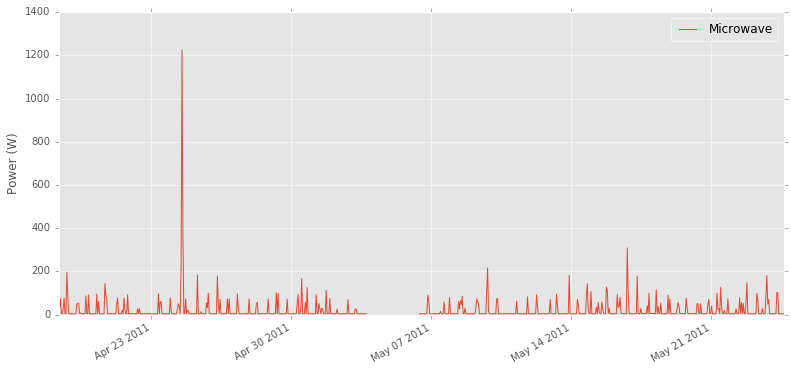

In [26]:
elec['microwave'].plot()

Como para todos: 

Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


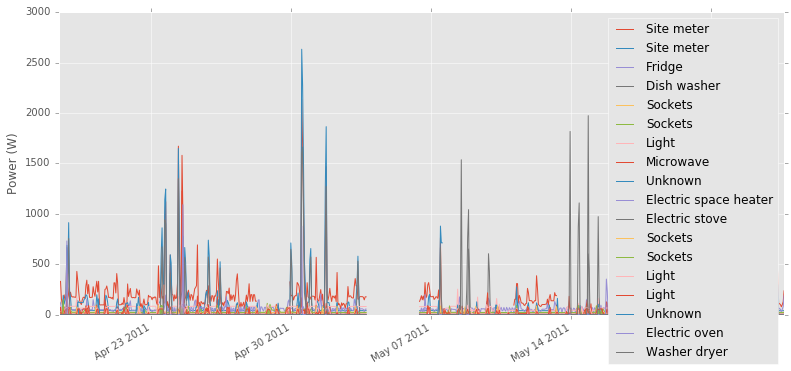

In [27]:
elec.plot()

## Ventanado 

Usamos Timeframe: 

In [28]:
fridge.get_timeframe()

TimeFrame(start='2011-04-18 09:22:13-04:00', end='2011-05-24 15:56:34-04:00', empty=False)

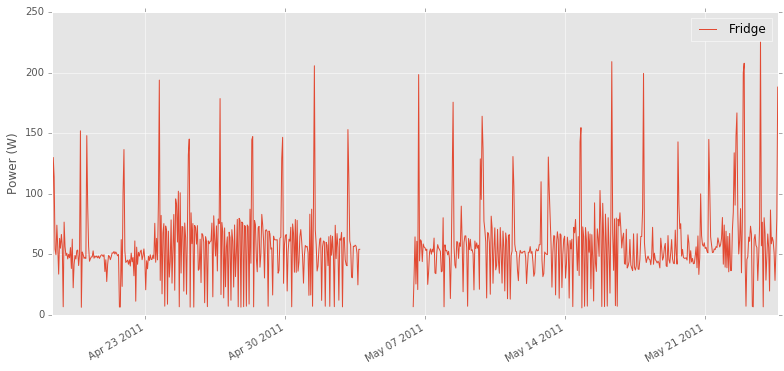

In [29]:
fridge.plot()

In [30]:
from nilmtk import TimeFrame
fridge.store.window = TimeFrame("2011-04-23  20:00:00-04:00", "2011-04-30  20:00:00-04:00")
fridge.get_timeframe()

TimeFrame(start='2011-04-23 20:00:00-04:00', end='2011-04-30 20:00:00-04:00', empty=False)

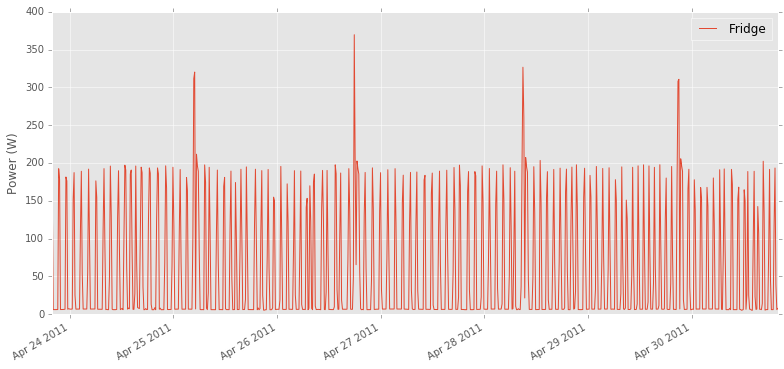

In [31]:
fridge.plot()

Otra manera de definir el ventanado: 

In [32]:
fridge.store.window.start="2011-04-23  20:00:00-04:00"
fridge.store.window.end="2011-04-30  20:00:00-04:00"
fridge.get_timeframe()

TimeFrame(start='2011-04-23 20:00:00-04:00', end='2011-04-30 20:00:00-04:00', empty=False)

Para eliminar el ventanado: 

In [33]:
fridge.store.window.clear()
fridge.get_timeframe()

TimeFrame(start='2011-04-18 09:22:13-04:00', end='2011-05-24 15:56:34-04:00', empty=False)

In [34]:
type(fridge)

nilmtk.elecmeter.ElecMeter

## Obtener un DataFrame desde un  MeterGroup

En algunos casos, nos interesa operar usando puramente un dataframe de pandas. Pasar de un EleMeter o MeterGroup a pandas es facil: 

In [35]:
metergrup_fridge=fridge.upstream_meter()

In [36]:
df=metergrup_fridge.dataframe_of_meters().resample('30S')

In [37]:
df.head()

,"(1, 1, REDD)","(2, 1, REDD)"
2011-04-18 09:22:00-04:00,222.934287,118.972858
2011-04-18 09:22:30-04:00,224.011667,118.915666
2011-04-18 09:23:00-04:00,225.868332,118.950000
2011-04-18 09:23:30-04:00,226.840335,119.401667
2011-04-18 09:24:00-04:00,223.826667,121.805000


# Ejercicio:  

Dada la base de datos iawe, cuyo path se indica a continuación: 

In [38]:
iawe_path='data/iawe.h5'

##### 1.- Carga la base de datos: 

In [39]:
from nilmtk import DataSet
iawe=DataSet(iawe_path)

##### 2.- ¿Cuantos Edicios, MeterGroups y ElecMeters existen en la base de datos?

In [40]:
print str(len(iawe.buildings))+" edificio"

1 edificio


In [41]:
elec=iawe.buildings[1].elec
print elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='iAWE', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='iAWE', site_meter, appliances=[])
  ElecMeter(instance=3, building=1, dataset='iAWE', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=4, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=1)])
  ElecMeter(instance=5, building=1, dataset='iAWE', appliances=[Appliance(type='air conditioner', instance=2)])
  ElecMeter(instance=6, building=1, dataset='iAWE', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=7, building=1, dataset='iAWE', appliances=[Appliance(type='computer', instance=1)])
  ElecMeter(instance=8, building=1, dataset='iAWE', appliances=[Appliance(type='clothes iron', instance=1)])
  ElecMeter(instance=9, building=1, dataset='iAWE', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=10, building=1, dataset='iAWE', appliances=[A

##### 3.- Revisando los metadatos. ¿Cual es el país y la localidad, numero de días de monitorización y modelo del medidor utilizado?

In [42]:
iawe.metadata

{'contact': 'nipunb@iiitd.ac.in',
 'creators': ['Batra, Nipun',
  'Gulati, Manoj',
  'Singh, Amarjeet',
  'Srivastava, Mani'],
 'description': '73 days of ambient, water and electricity data for a home in Delhi',
 'geo_location': {'country': 'IN',
  'latitude': 28.64,
  'locality': 'Delhi',
  'longitude': 77.11},
 'institution': 'Indraprastha Institute of Information Technology Delhi (IIITD)',
 'long_name': 'Indian dataset for ambient, water and electricity sensing',
 'meter_devices': {'EM6400': {'description': 'Multifunction meter for feeders',
   'manufacturer': 'Schneider Electric',
   'manufacturer_url': 'http://www.schneider-electric.com/',
   'max_sample_period': 300,
   'measurements': [{'lower_limit': 0,
     'physical_quantity': 'power',
     'type': 'active',
     'upper_limit': 10000},
    {'lower_limit': 0,
     'physical_quantity': 'power',
     'type': 'apparent',
     'upper_limit': 10000},
    {'lower_limit': 0,
     'physical_quantity': 'power',
     'type': 'reactive'

##### 4.- ¿Cuales son los 4 dispositivos que más consumen? ¿Cual es la potencia *activa, reactiva y aparente* total de los 4? ¿Que potencia activa consume cada uno? 

In [43]:
top_4=elec.submeters().select_top_k(4)
top_4.appliances

10/10 ElecMeter(instance=12, building=1, dataset='iAWE', appliances=[Appliance(type='motor', instance=1)])

[Appliance(type='air conditioner', instance=2),
 Appliance(type='fridge', instance=1),
 Appliance(type='computer', instance=1),
 Appliance(type='air conditioner', instance=1)]

In [44]:
top_4.total_energy()

Calculating total_energy for ElecMeterID(instance=3, building=1, dataset='iAWE') ...   

active      514.768632
reactive    131.659896
apparent    559.007857
dtype: float64

In [45]:
top_4.energy_per_meter()

4/4 ElecMeter(instance=3, building=1, dataset='iAWE', appliances=[Appliance(type='fridge', instance=1)])

,"(7, 1, iAWE)","(5, 1, iAWE)","(4, 1, iAWE)","(3, 1, iAWE)"
active,24.351512,203.889213,203.569523,82.958385
apparent,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN


##### Obtener el consumo de potencia por día de todo el edificio y del frigorífico. Comparar ambos en una gráfica.  

Nota 1: Obtener un MeterGroup con los "site_meters" (usando la función mains())

Nota 2: Usar la función power series para extraer la potencia activa sampleando a 86400 segundos

Loading data for meter ElecMeterID(instance=2, building=1, dataset='iAWE')     
Done loading data all meters for this chunk.


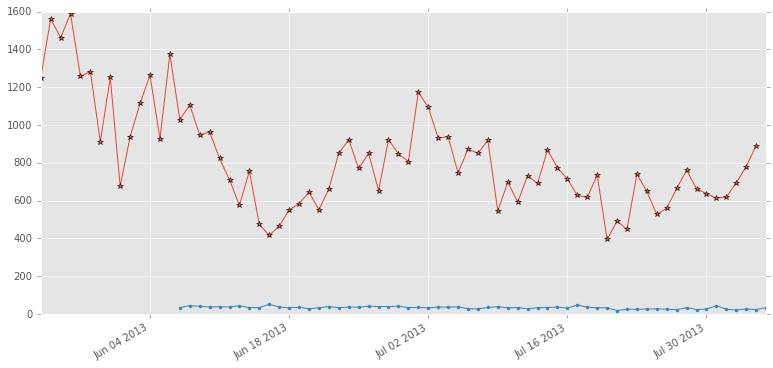

In [48]:
mains=elec.mains().power_series(ac_type='active',sample_period=86400).next()

fridge=elec['computer'].power_series(ac_type='active',sample_period=86400).next()

mains.plot(marker='*')
fridge.plot(marker='.')

## Para aprender más de NILMTK: 

https://github.com/nilmtk/nilmtk/tree/master/docs/manual